<a href="https://colab.research.google.com/github/Rovidicus/Prediction-of-Product-Sales/blob/main/PredictionofProductSales_LukeH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Luke Hobbs



## Project Overview


## Load and Inspect Data


In [1]:
# importing necessary packages
import pandas as pd
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Saving the filepath and assigning dataframe as df
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)

In [3]:
# Previewing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data


In [5]:
# Presenting number of rows and columns
df.shape

(8523, 12)

In [6]:
# Identifying datatypes of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [41]:
# Discover and remove duplicates
dup_rows = df.duplicated()
dup_rows.sum()

0

In [9]:
# Renaming columns to be more presentable with dictionary
rename_dict = {'Item_Identifier': 'Product ID', 'Item_Weight': 'Weight',
                'Item_Fat_Content': 'Fat Content', 'Item_Visibility': 'Percent Visible',
                'Item_Type':'Item Type', 'Item_MRP': 'Max Retail Price', 'Outlet_Identifier': 'Store ID',
                'Outlet_Establishment_Year': 'Year Established', 'Outlet_Size': 'Store Size',
                'Outlet_Location_Type': 'Location Type', 'Outlet_Type': 'Store Type', 'Item_Outlet_Sales': 'Item Store Sales' }
df = df.rename(rename_dict, axis=1)
df.head()

,Product ID,Weight,Fat Content,Percent Visible,Item Type,Max Retail Price,Store ID,Year Established,Store Size,Location Type,Store Type,Item Store Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
# Checking for how many unique values are in each column
df.nunique()

Product ID          1559
Weight               415
Fat Content            5
Percent Visible     7880
Item Type             16
Max Retail Price    5938
Store ID              10
Year Established       9
Store Size             3
Location Type          3
Store Type             4
Item Store Sales    3493
dtype: int64

In [16]:
# Adjusting percent Visible to reflect actual percentage
df['Percent Visible'] = df['Percent Visible'].multiply(100)
df['Percent Visible']

0        1.604730
1        1.927822
2        1.676007
3        0.000000
4        0.000000
          ...    
8518     5.678339
8519     4.698243
8520     3.518627
8521    14.522065
8522     4.487828
Name: Percent Visible, Length: 8523, dtype: float64

In [17]:
df.head()

,Product ID,Weight,Fat Content,Percent Visible,Item Type,Max Retail Price,Store ID,Year Established,Store Size,Location Type,Store Type,Item Store Sales
0,FDA15,9.30,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,1.676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
# Identify Missing Values
# Making variable for number of null values
df_nulls = df.isna()
len(df_nulls)

8523

In [19]:
# Calculating the percentage of null values for each column.
df_null_sum = df_nulls.sum()
null_percent = df_null_sum / len(df) * 100
null_percent

Product ID           0.000000
Weight              17.165317
Fat Content          0.000000
Percent Visible      0.000000
Item Type            0.000000
Max Retail Price     0.000000
Store ID             0.000000
Year Established     0.000000
Store Size          28.276428
Location Type        0.000000
Store Type           0.000000
Item Store Sales     0.000000
dtype: float64

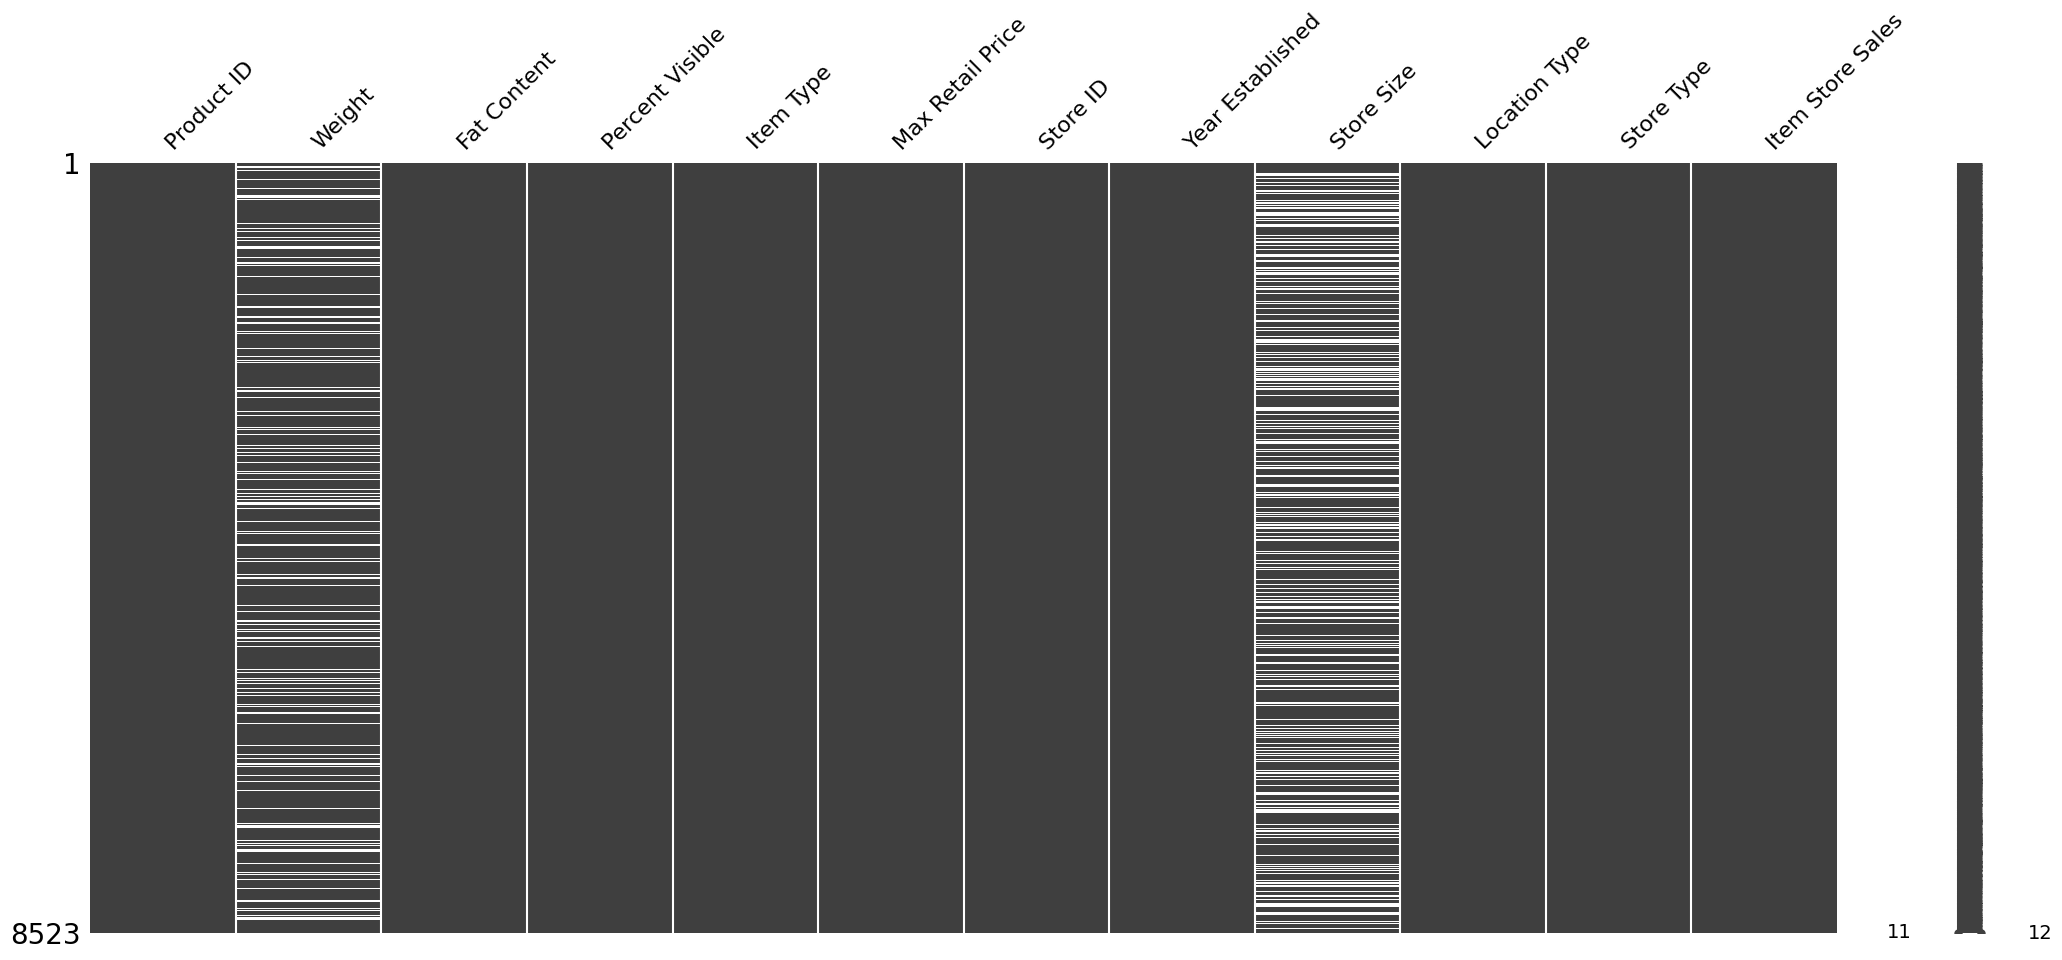

In [21]:
# Visualizing the missing values using the missingno package.
import missingno as msno
msno.matrix(df);

In [22]:
# Create placeholder values for columns 'Store Size' and 'Weight'
df['Store Size'] = df['Store Size'].fillna('MISSING')
df['Store Size'].isna().sum()

0

In [23]:
df['Weight'] = df['Weight'].fillna(-1)
df['Store Size'].isna().sum()

0

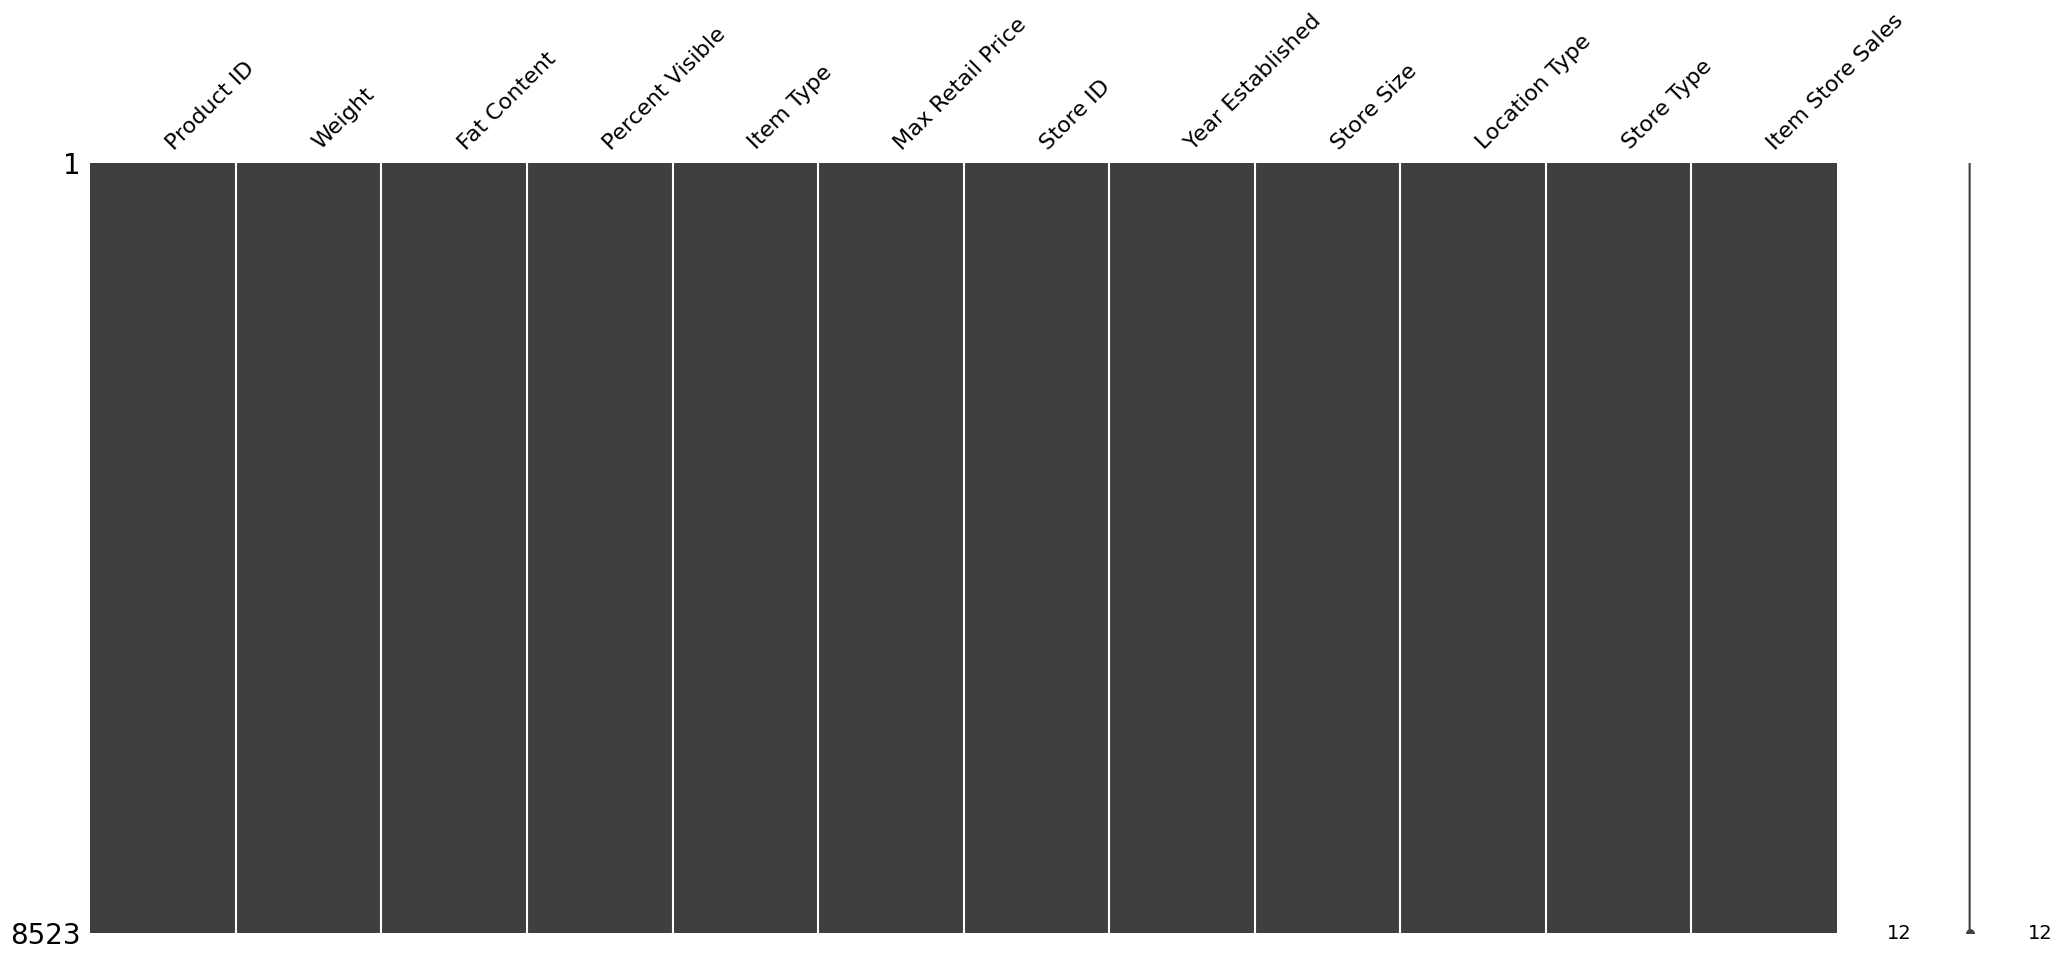

In [24]:
# Check for missing values in missingno
msno.matrix(df);

In [25]:
# Find and fix any inconsistent categories of data.
# Saving a list of object columns
obj_cols = df.select_dtypes('object').columns
obj_cols

Index(['Product ID', 'Fat Content', 'Item Type', 'Store ID', 'Store Size',
       'Location Type', 'Store Type'],
      dtype='object')

In [26]:
# Check the nunique for just the object cols
obj_cols.nunique()

7

In [27]:
# looping through the list of string columns
  # printing the value counts for the column and an empty line for readability
for col in obj_cols:
  print(f'The Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

The Value Counts for Product ID
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Product ID, Length: 1559, dtype: int64


The Value Counts for Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Fat Content, dtype: int64


The Value Counts for Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item Type, dtype: int64


The Value Counts for Store ID
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930

In [29]:
# Reassign 'Fat Content' value 'LF' to 'Low Fat'
df['Fat Content'] = df['Fat Content'].str.replace('LF', 'Low Fat')
df['Fat Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Fat Content, dtype: int64

In [30]:
# Now reassign 'low fat' to 'Low Fat'
df['Fat Content'] = df['Fat Content'].str.replace('low fat', 'Low Fat')
df['Fat Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Fat Content, dtype: int64

In [31]:
# Reassigning 'reg' to 'Regular'
df['Fat Content'] = df['Fat Content'].str.replace('reg', 'Regular')
df['Fat Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Fat Content, dtype: int64

In [32]:
# Reassign value name 'High' in 'Store Size' column to more appropriate name: 'Large'
df['Store Size'] = df['Store Size'].str.replace('High', 'Large')
df['Store Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Store Size, dtype: int64

In [33]:
# Save a list of number columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Weight', 'Percent Visible', 'Max Retail Price', 'Year Established',
       'Item Store Sales'],
      dtype='object')

In [34]:
# Check the nunique for just the object cols
num_cols.nunique()

5

In [35]:
# looping through the list of string columns
  # printing the value counts for the column and an empty line for readability.

for col in num_cols:
  print(f'The Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

The Value Counts for Weight
-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Weight, Length: 416, dtype: int64


The Value Counts for Percent Visible
0.000000     526
7.697512       3
16.246204      2
7.684109       2
7.356248       2
            ... 
1.395731       1
11.045983      1
12.464554      1
5.414209       1
4.487828       1
Name: Percent Visible, Length: 7880, dtype: int64


The Value Counts for Max Retail Price
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Max Retail Price, Length: 5938, dtype: int64


The Value Counts for Year Established
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Year Established, dtype: int64


The Value Counts for Item Store Sales
9

In [37]:
# Set index to relevant identifying column: Product ID
df = df.set_index('Product ID')
df

,Weight,Fat Content,Percent Visible,Item Type,Max Retail Price,Store ID,Year Established,Store Size,Location Type,Store Type,Item Store Sales
Product ID,,,,,,,,,,,
FDA15,9.300,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,1.676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
FDF22,6.865,Low Fat,5.678339,Snack Foods,214.5218,OUT013,1987,Large,Tier 3,Supermarket Type1,2778.3834
FDS36,8.380,Regular,4.698243,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
NCJ29,10.600,Low Fat,3.518627,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [40]:
# Display the min, the max and the average of the numerical columns
df[num_cols].describe()

,Weight,Percent Visible,Max Retail Price,Year Established,Item Store Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,6.613203,140.992782,1997.831867,2181.288914
std,6.720742,5.159782,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,2.698948,93.826500,1987.000000,834.247400
50%,11.000000,5.393093,143.012800,1999.000000,1794.331000
75%,16.000000,9.458529,185.643700,2004.000000,3101.296400
max,21.350000,32.839095,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

## Feature Inspection